# Summary
The primary reason for team members leaving comes down to being in one of two groups:
- HIgh performers with a lot of experience
- Low performers

The two major factors, were the number of projects they worked on and their last evaluation. The higher those two are at the same time, the more likely team members are to leave. i.e. a high evaluation and low number of projects means that team members are more likely to stay.

One underlying assumption is that satisfaction level is the best proxy for why they would team members would leave as it could represent any factor of their role.

For obvious reasons, the factors are interconnected. More projects correlates with high hours. More hours correlates with high performance.

The main information lacking in this data set is the reason for leaving. As an example, we can't be clear if experienced high performers leave because they don't feel appreciated or if they are being head hunted.

## Process

1. Begin! Explore the data set...
2. Look for correlations
3. Segement the data to explore groups further
4. Use Chi-Squared to confirm relationships in the data

## Import

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

raw = pd.read_csv(r'../input/HR_comma_sep.csv')
print(raw.shape)
print(raw.head())

(14999, 10)
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3 

In [3]:
sal_dict = {'low': 1, 'medium': 2, 'high': 3}
raw['salary_map'] = raw['salary'].map(sal_dict)

## 1. Begin! Explore the data set...
We open by establishing a basic picture of the organisation by department and how many members of staff have left:
- Where do they work?
- How much of the sample data set have actually left, per department and in total?

23% (3,571) of the 14,999 have left. This level is similar across all depts, except management and R&D.

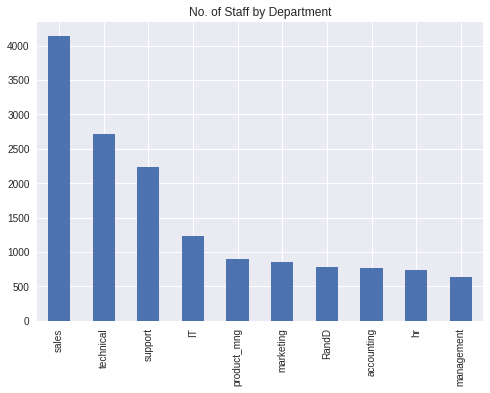


 What % of the department have left?
IT             0.222494
RandD          0.153748
accounting     0.265971
hr             0.290934
management     0.144444
marketing      0.236597
product_mng    0.219512
sales          0.244928
support        0.248991
technical      0.256250
Name: sales, dtype: float64
Avg. leavers per dept is  0.22838688013504999


In [4]:
#print("What department are they in?")
#print(raw['sales'].value_counts())

vc = raw['sales'].value_counts().plot(kind='bar', title="No. of Staff by Department")
plt.show()

raw_depts = raw['sales'].value_counts()
left = raw[raw["left"]==1]
left_depts = left['sales'].value_counts()

print("\n What % of the department have left?")
percent_dept_left = left_depts/raw_depts
print(percent_dept_left)
print("Avg. leavers per dept is ",percent_dept_left.mean())
#print(left['sales'].value_counts())

# Basic correlations

To get an understanding of the data we split the staff into three views: all staff, leavers and stayers. Then we look at correlations between all factors using the Seabron Heatmaps. Immediately we get a strong visual of where the issues lie. 

For visual purposes I have excluded the exact correlation figures but they can be added to heatmaps by adding 'annot = True'.


### Notable correlations
For those who stayed correlations are always > -0.1 or < 0.1. No trends at all is unexpected, especially when compared to those who left. It's as if those who stayed are mediocre in every way

The strongest correlations for those who have left are 
(1) 0.88 correlation between number of projects and hours, and 
(2) 0.83 between average_monthly_hours and last_evaluation 

- A notable correlation (0.78) is that last_evaluation is strongly linked to time at the company. This implies a broader issue with regard to how the company is run.

> ** The hypothesis** at this point becomes "The better performing and more experienced you are at the company the more likely you are to leave."

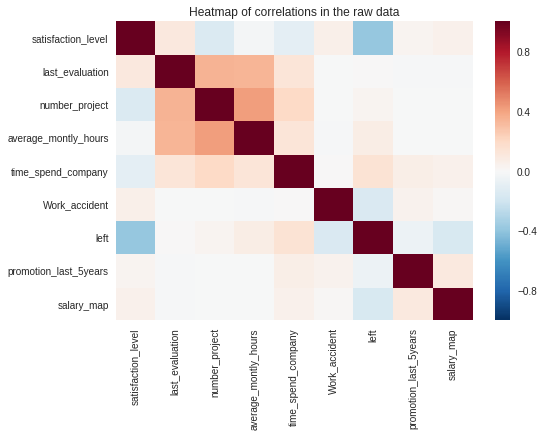

In [5]:
#Correlation Matrix
corr = raw.corr()
#corr = (corr)
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of correlations in the raw data')

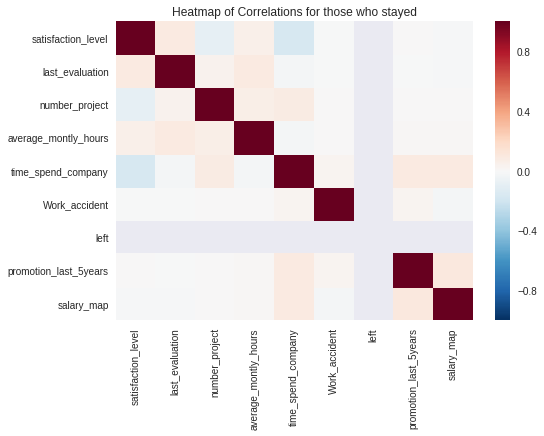

In [6]:
stay_corr = raw[raw['left']==0]
stay_corr = stay_corr.corr()
sns.heatmap(stay_corr,
           xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title("Heatmap of Correlations for those who stayed")
           

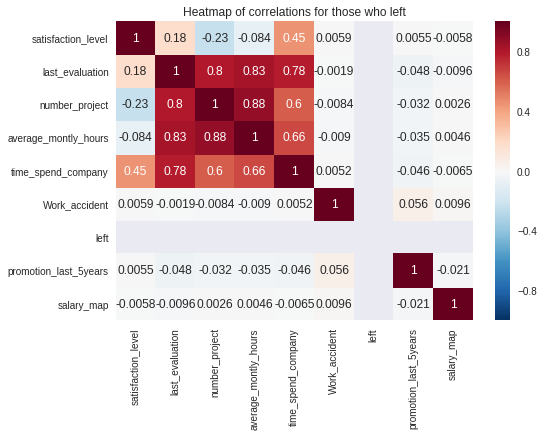

In [7]:
leave_corr = raw[raw['left']==1]
leave_corr = leave_corr.corr()
sns.heatmap(leave_corr, annot = True,
           xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title("Heatmap of correlations for those who left")

## Next Steps
We have a good understanding at this point that that the management team, and the R&D team have the lowest rate of leavers. We also know that for those who do leave they have bigger issues with their workload (projects and hours), plus potentially something with culture (evaluation connected to tenure).

1. Explore the link between performance and leaving
1. Explore the link between No of Projects and leaving
1. What's the difference between management, and R&D, and everyone else?

## Correlating evaluations with the number of projects

Seeing correlation is one factor. The next step is to explore the shapes of the data. Using scatters alongside box and whisker plots we beging to see that there may be another level to our data that includes low performers. The IQR for each factor with leavers is significantly larger than for those who stayed, this is displayed well in the scatter too.

We see that there are two groups most likely to leave. 
1. High performers given a lot of projects
2. Low performers given a low number of projects (presumably low performers are always given low work loads) 


In [8]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
group_names = ['0.2', '0.4', '0.6', '0.8', '1'] #Create names for the groups
categories = pd.cut(raw['last_evaluation'], bins, labels=group_names) #Cut based a column
raw['eval_categories'] = pd.cut(raw['last_evaluation'], bins, labels=group_names) #Create new column

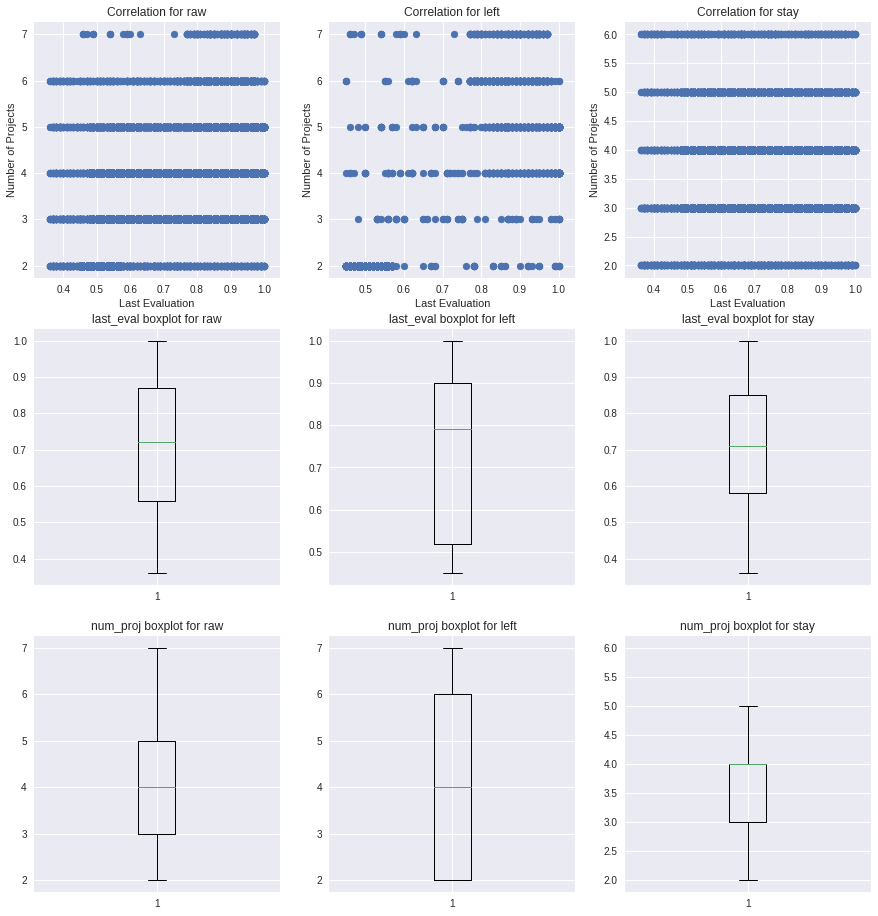

In [10]:
stay = raw[raw['left']==0]
fig = plt.figure(figsize=(15,16))

dfs = [raw,left,stay]
df_str = ['raw','left','stay']

for n in range(0,3):
    last_eval = (dfs[n])
    last_eval2 = (dfs[n]['last_evaluation'])
    num_proj = (dfs[n]['number_project'])

    ax = fig.add_subplot(3,3,n+1)
    ax.scatter(last_eval2,num_proj)
    ax.set_title("Correlation for " + df_str[n])
    ax.tick_params(bottom="off", top="off", left="off", right="off")    
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    plt.xlabel('Last Evaluation')
    plt.ylabel('Number of Projects')
    
    ax = fig.add_subplot(3,3,n+4)
    ax.boxplot(last_eval2.values)
    ax.set_title("last_eval boxplot for " + df_str[n])
    
    ax = fig.add_subplot(3,3,n+7)
    ax.boxplot(num_proj.values)
    ax.set_title("num_proj boxplot for " + df_str[n])
plt.show()



## High performance analysis
We care more about losing high-performance team members, so here we dive into the correlations for those who stayed and those who left to see which factors might add some more details.

The relationship between between satisfaction and number_projects is -0.73 for those who stayed and drops even further to -0.81 for those who left. Interestingly the relationship between hours and nmber_projects only moves from 0.45 to 0.46.

Time spent at the company has a fascinating relationship to satisfaction. For leavers it is 0.74. For stayers it's -0.0039. This is the biggest change in relationship though the mean from those who stayed to those who left only went from 3.4 years to 3.9 (not split by high performance).

In [ ]:
high_p = raw[raw['number_project']>4]
high_p = high_p[high_p['last_evaluation']>0.75]
high_p_left = high_p[high_p['left']==1]

high_p = high_p.corr()
high_p_left = high_p_left.corr()
sns.heatmap(high_p,annot = True,
            xticklabels = high_p.columns.values, 
            yticklabels = high_p.columns.values)

sns.plt.title('Correlations for high performers who have stayed')

In [ ]:
sns.heatmap(high_p_left, annot = True,
            xticklabels = high_p_left.columns.values, 
            yticklabels = high_p_left.columns.values)
sns.plt.title("Correlations for high performers who have left")

In [ ]:
print("Describe time spent at company for those who stayed")
print(stay['time_spend_company'].describe())
print("\n \n Describe time spent at company for those who left")
print(left['time_spend_company'].describe())
print("\n \n Time_spend_company value counts")
print(raw['time_spend_company'].value_counts())

### How do management and R&D compare to everyone else?
We know that they leave at a significantly lower rate. We don't know why. Do they get less projects than others?

In [ ]:
low_leave_dept = raw[raw['sales'].isin(['RandD','management'])]
low_leave_dept.groupby(by='sales').mean().reset_index()


In [ ]:
left.groupby(by='sales').mean().reset_index()


In [ ]:
stay.groupby(by='sales').mean().reset_index()

# Is there a statistically significant relationship between leavers for performance, projects and hours? 
### Using Chi-Squared.



## Performance
We start by splitting performance into three groups, high performers will be one StdDev from the mean, low performers will be one below. The third group will be the total spread (it should be avg performers but I haven't figured out how to do an AND rule when selecting from a df).

In [ ]:
high_perf_mean = raw['last_evaluation'].mean()
high_perf_std = np.std(raw['last_evaluation'])

high_perf_group = raw[raw['last_evaluation'] >= high_perf_mean + high_perf_std]
low_perf_group = raw[raw['last_evaluation'] <= high_perf_mean - high_perf_std]

left_high_perf_group = high_perf_group[high_perf_group['left'] == 1]['last_evaluation']
left_low_perf_group = low_perf_group[low_perf_group['left'] == 1]['last_evaluation']

In [ ]:
from scipy.stats import chisquare

perf_data_sets = [high_perf_group, low_perf_group, raw] # Change the data sets to be sure it's not being skewed.
left_perf_data_sets = [left_high_perf_group, left_low_perf_group, left]

observed = [len(i) for i in left_perf_data_sets]
all_team = [len(i) for i in perf_data_sets]
expected = [o * 0.23 for o in all_team] # on avg, 23% of each dept left so this is our expected value

chisquare_value, pvalue = chisquare(observed, expected)

print(observed)
print(expected)

print("Chi-Square value is ", chisquare_value)
print("pvalue is ", pvalue)

## Projects

In [ ]:
proj_mean = raw['number_project'].mean()
proj_stddev = np.std(raw['number_project'])

lots_proj = raw[raw['number_project'] >= proj_mean + proj_stddev]
barely_proj = raw[raw['number_project'] <= proj_mean - proj_stddev]

left_lots_proj = lots_proj[lots_proj['left'] == 1]
left_barely_proj = barely_proj[barely_proj['left'] == 1]

In [ ]:
proj_data_sets = [lots_proj, barely_proj]
left_proj_data_sets = [left_lots_proj, left_barely_proj]

observed = [len(i) for i in left_proj_data_sets] # cross section of the groups with those who had actually left
all_team = [len(i) for i in proj_data_sets]
expected = [o * 0.23 for o in all_team] # on avg, 23% of each dept left so this is our expected value

proj_chisquare, proj_pvalue = chisquare(observed, expected)

print(observed)
print(expected)

print("Chi-Square value is ", proj_chisquare)
print("pvalue is ", proj_pvalue)

## Time Spend Company

In [ ]:
time_mean = raw['time_spend_company'].mean()
time_stdD = np.std(raw['time_spend_company'])

oldish = raw[raw['time_spend_company'] >= time_mean + time_stdD]
newish = raw[raw['time_spend_company'] <= time_mean - time_stdD]

left_oldish = oldish[oldish['left'] ==1]
left_newish = newish[newish['left'] ==1]

time_sets = [oldish, newish, raw]
left_time_sets = [left_oldish, left_newish, left]

observed = [len(i) for i in left_time_sets] # cross section of the groups with those who had actually left
all_team = [len(i) for i in time_sets]
expected = [o * 0.23 for o in all_team] # on avg, 23% of each dept left so this is our expected value

time_chi, time_pvalue = chisquare(observed, expected)

print(observed)
print(expected)

print("time_chi is ", time_chi)
print("pvalue is ", time_pvalue)
print(type(pvalue))